Number of rows and columns: (9551, 21)
Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


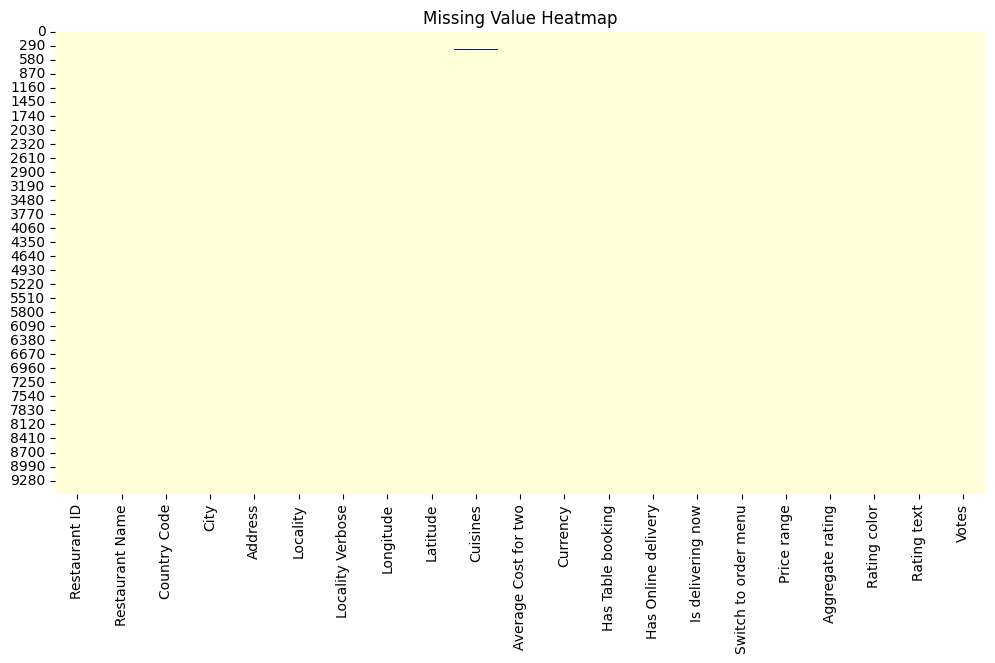

Data types before conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Aggregate Rating Value Counts:
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4   

/tmp/ipython-input-13-71549527.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')


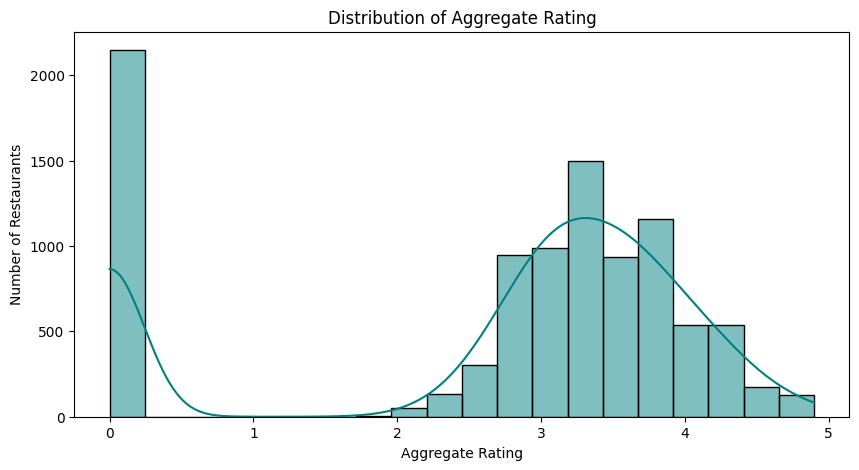

Aggregate Rating - Class Imbalance Check
Aggregate rating
0.0    22.511004
3.2     5.470551
3.1     5.439111
3.4     5.187592
3.3     5.061832
3.5     5.030392
3.0     4.904632
3.6     4.799832
3.7     4.474953
3.8     4.181513
2.9     3.992874
3.9     3.479354
2.8     3.301195
4.1     2.871515
4.0     2.787676
2.7     2.619996
4.2     2.316076
2.6     2.001677
4.3     1.823517
4.4     1.498638
2.5     1.152798
4.5     0.995598
2.4     0.911759
4.6     0.817439
4.9     0.639279
2.3     0.492559
4.7     0.429679
2.2     0.282960
4.8     0.262000
2.1     0.157200
2.0     0.073360
1.9     0.020960
1.8     0.010480
Name: count, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
df=pd.read_csv('zomato.csv',encoding='latin1')
df.head()
print("Number of rows and columns:",df.shape)
missing_values=df.isnull().sum()
print("Missing values in each column:\n",missing_values)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(),cbar=False,cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.show()
df=df.dropna(subset=['Cuisines','Aggregate rating'])
print("Data types before conversion:\n",df.dtypes)
df['Average Cost for two']=pd.to_numeric(df['Average Cost for two'],errors='coerce')
print("Aggregate Rating Value Counts:\n",df['Aggregate rating'].value_counts())
plt.figure(figsize=(10, 5))
sns.histplot(df['Aggregate rating'],bins=20,kde=True,color='teal')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()
print("Aggregate Rating - Class Imbalance Check")
rating_counts=df['Aggregate rating'].value_counts()
rating_percent=(rating_counts / df.shape[0]) * 100
print(rating_percent)
